# Laboratorio 10

### Integrantes:
* Juan Diego Avila 20090
* Diego Franco 20240
* Manuel Archila 161250

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [30]:
def fitness_quadratic(x):
    return x**2 + 2*x + 5

def fitness_ackley(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2.0 * np.pi * x) + np.cos(2.0 * np.pi * y))) + np.e + 20

def one_point_crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def roulette_wheel_selection(population, fitness_values):
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    selected_individual = random.choices(population, probabilities)[0]
    return selected_individual

def bitflip_mutation(individual, mutation_rate):
    mutated_individual = list(individual)
    for i in range(len(mutated_individual)):
        if random.random() < mutation_rate:
            mutated_individual[i] = '1' if individual[i] == '0' else '0'
    return ''.join(mutated_individual)

def decode_solution(solution, bits_per_variable, value_range):
    x_bits = solution[:bits_per_variable]
    y_bits = solution[bits_per_variable:]
    
    x = int(x_bits, 2) / (2**bits_per_variable - 1) * (value_range[1] - value_range[0]) + value_range[0]
    y = int(y_bits, 2) / (2**bits_per_variable - 1) * (value_range[1] - value_range[0]) + value_range[0]
    
    return x, y

def genetic_algorithm(population_size, generations, mutation_rate, fitness_function_choice, bits_per_variable, value_range):
    # Inicialización de la población
    population = [''.join(random.choices('01', k=2*bits_per_variable)) for _ in range(population_size)]
    best_solutions = []
    population_history = []

    for generation in range(generations):
        # Decodificación y evaluación de la aptitud
        decoded_population = [decode_solution(individual, bits_per_variable, value_range) for individual in population]
        if fitness_function_choice == 'quadratic':
            fitness_values = [fitness_quadratic(x) for x, y in decoded_population]
        elif fitness_function_choice == 'ackley':
            fitness_values = [fitness_ackley(x, y) for x, y in decoded_population]
        else:
            raise ValueError("La elección de la función de fitness no es válida. Elige 'quadratic' o 'ackley'.")

        # Selección y reproducción
        new_population = []
        population_history.append(decoded_population)
        for _ in range(population_size // 2):
            parent1 = roulette_wheel_selection(population, fitness_values)
            parent2 = roulette_wheel_selection(population, fitness_values)
            child1, child2 = one_point_crossover(parent1, parent2)
            child1 = bitflip_mutation(child1, mutation_rate)
            child2 = bitflip_mutation(child2, mutation_rate)
            new_population.extend([child1, child2])
        population = new_population

        # Registro de la mejor solución
        best_individual = max(population, key=lambda x: fitness_values[population.index(x)])
        best_x, best_y = decode_solution(best_individual, bits_per_variable, value_range)
        best_fitness = fitness_values[population.index(best_individual)]
        best_solutions.append((best_x, best_y, best_fitness))

    return best_solutions, population_history



Mejor Solución (x, y): (-4.1148088807507435, 12.219424734874494)
Valor de Fitness: 22.176937439828468


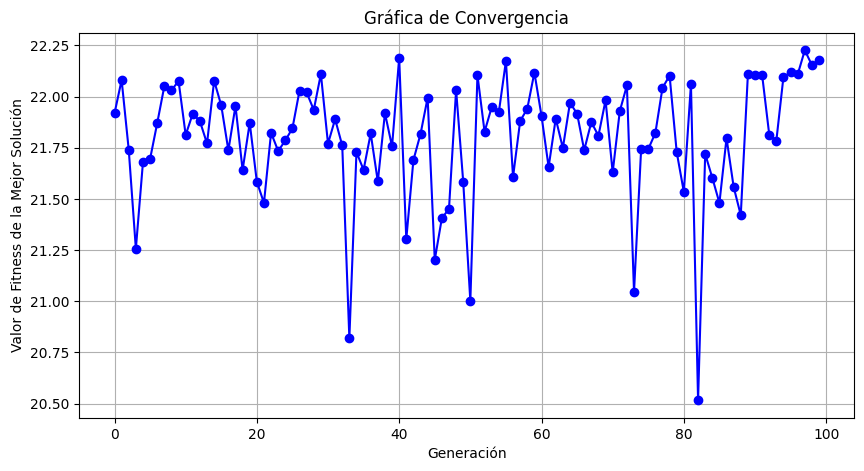

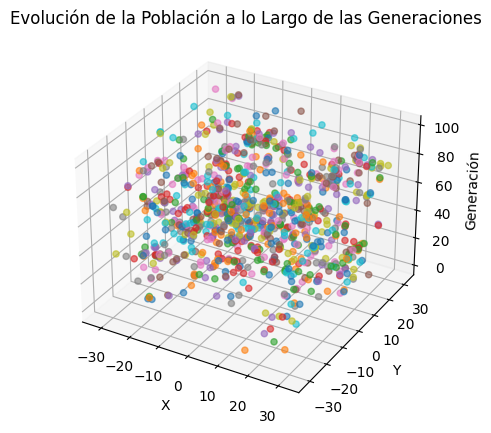

In [31]:

# Definición explícita de los parámetros del algoritmo genético
population_size = 10
generations = 100
mutation_rate = 0.1
fitness_function_choice = 'ackley'  # Puede ser 'quadratic' o 'ackley'
bits_per_variable = 16
value_range = (-32, 32)

# Ejecutar el algoritmo genético
best_solutions, population_history = genetic_algorithm(
    population_size, generations, mutation_rate, fitness_function_choice, bits_per_variable, value_range
)

# Mostrar la mejor solución y su valor de fitness
best_solution_x, best_solution_y, best_fitness = best_solutions[-1]
print("Mejor Solución (x, y):", (best_solution_x, best_solution_y))
print("Valor de Fitness:", best_fitness)

# Preparar datos para las visualizaciones
generations_list = list(range(generations))
best_solutions_x = [solution[0] for solution in best_solutions]
best_solutions_y = [solution[1] for solution in best_solutions]
fitness_values = [solution[2] for solution in best_solutions]

# Gráfica de Convergencia
plt.figure(figsize=(10, 5))
plt.plot(generations_list, fitness_values, marker='o', linestyle='-', color='b')
plt.title('Gráfica de Convergencia')
plt.xlabel('Generación')
plt.ylabel('Valor de Fitness de la Mejor Solución')
plt.grid(True)
plt.show()

# Visualización de la Evolución de la Población
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
for generation, population in enumerate(population_history):
    xs = [individual[0] for individual in population]
    ys = [individual[1] for individual in population]
    zs = [generation] * len(population)
    ax.scatter(xs, ys, zs, alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Generación')
plt.title('Evolución de la Población a lo Largo de las Generaciones')
plt.show()

Mejor Solución (x, y): (27.782162203402763, -31.060532539864194)
Valor de Fitness: 1034.6975412290608


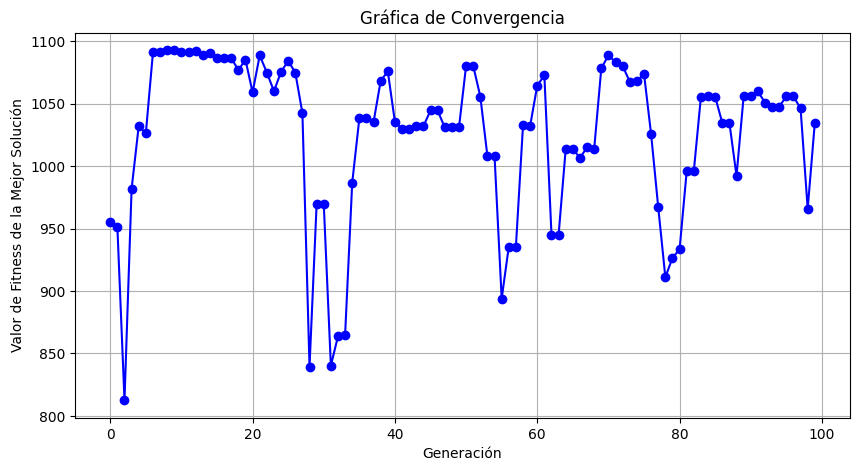

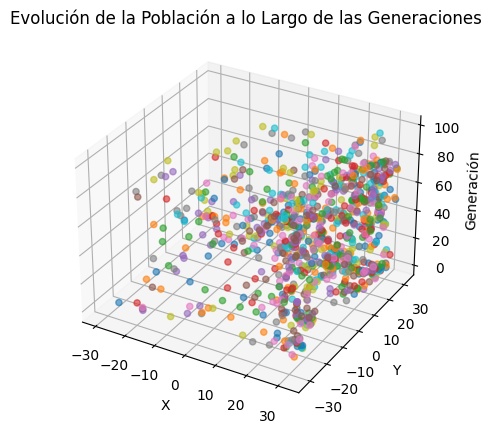

In [32]:
# Definición explícita de los parámetros del algoritmo genético
population_size = 10
generations = 100
mutation_rate = 0.1
fitness_function_choice = 'quadratic' 
bits_per_variable = 16
value_range = (-32, 32)

# Ejecutar el algoritmo genético
best_solutions, population_history = genetic_algorithm(
    population_size, generations, mutation_rate, fitness_function_choice, bits_per_variable, value_range
)

# Mostrar la mejor solución y su valor de fitness
best_solution_x, best_solution_y, best_fitness = best_solutions[-1]
print("Mejor Solución (x, y):", (best_solution_x, best_solution_y))
print("Valor de Fitness:", best_fitness)

# Preparar datos para las visualizaciones
generations_list = list(range(generations))
best_solutions_x = [solution[0] for solution in best_solutions]
best_solutions_y = [solution[1] for solution in best_solutions]
fitness_values = [solution[2] for solution in best_solutions]

# Gráfica de Convergencia
plt.figure(figsize=(10, 5))
plt.plot(generations_list, fitness_values, marker='o', linestyle='-', color='b')
plt.title('Gráfica de Convergencia')
plt.xlabel('Generación')
plt.ylabel('Valor de Fitness de la Mejor Solución')
plt.grid(True)
plt.show()

# Visualización de la Evolución de la Población
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
for generation, population in enumerate(population_history):
    xs = [individual[0] for individual in population]
    ys = [individual[1] for individual in population]
    zs = [generation] * len(population)
    ax.scatter(xs, ys, zs, alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Generación')
plt.title('Evolución de la Población a lo Largo de las Generaciones')
plt.show()

Este código utiliza un algoritmo genético para encontrar la mejor solución para la función de fitness proporcionada, mostrando la evolución de la población y la convergencia del algoritmo a lo largo de las generaciones. 
- En la primera funcion al ser de unicamente una variable se puede ver que el algorimo busca el valor de x que maximiza la funcion, la representación de esto es una grafica bidimensional buscando los valores más altos posibles para x.
- Por otro lado, en la segunda funcion al ser de dos variables se puede ver que el algoritmo busca el valor de x y y que maximiza la funcion, la representación de esto es una grafica tridimensional buscando los valores más consistentes para x y y. 

Se eligio el algoritmo de Ackley porque tiene muchos óptimos locales, lo que hace que sea un problema difícil para los algoritmos genéticos y de optimización en general, por lo que es un buen problema para probar la eficacia de los algoritmos.

### Referencias

Ackley Function. (2013). Retrieved October 27, 2023, from Www.sfu.ca website: https://www.sfu.ca/~ssurjano/ackley.html